In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\akumar5\\Documents\\Python Bootcamp'

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
X = df.drop('sales', axis=1)
y = df['sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
linear_model = LinearRegression()

In [14]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = linear_model.predict(X_test)

In [16]:
mean_absolute_error(y_test, y_pred)

1.213745773614481

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.516151937599388

In [122]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [123]:
poly_features = poly_converter.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [125]:
poly_model = LinearRegression()

In [126]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = poly_model.predict(X_test)

In [128]:
mean_absolute_error(y_test, y_pred)

0.4127516085326542

In [129]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5803286825165035

In [130]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X,y)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(y_train, train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_error)
    test_rmse_errors.append(test_error)



In [131]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399342,
 0.2509342947031756,
 0.19704459846550335,
 5.421420485986226,
 0.14180598547601236,
 0.16654227322955148]

In [132]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649213955,
 2.575831166466207,
 4.492699702511413,
 1381.4044216899786,
 4449.599748615501,
 95891.24543526075]

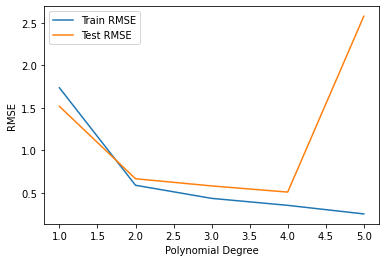

In [133]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()